# **CASE STUDY ON CRIME DATA**

**CONTEXT :**
This dataset provides a detailed overview of various types of crimes reported in different cities and states, facilitating analysis of crime patterns and trends across geographical locations.

---
**OBJECTIVES:**
1. Crime Categorization:

Classify cities into different crime risk categories based on the crime statistics.

2. Pattern Recognition:

Discover patterns and relationships between different types of crimes (e.g., how often robbery is associated with aggravated assault) in different locations.

3. Crime Factor Analysis:

Identify and understand the key factors that contribute most significantly to high crime rates in a city.

4. Crime Rate Comparison:

Compare crime rates between different states or cities to identify areas that require more attention or different intervention strategies.

---
**KEY QUESTIONS**

1. How should we define the categories for crime risk?
What thresholds or criteria will we use to categorize cities into these risk levels?
2. Which features (crime statistics) are most important for accurately classifying cities into risk categories?
3. What patterns and relationships exist between different types of crimes?
4. How well does the decision tree model perform in terms of precision, recall, and accuracy for each risk category?
---
**DATASET:**
The dataset named "crime.csv" contains the following variables related to crime statistics in various cities across different states:


*  ViolentCrime: Total number of violent crime incidents.
*   Murder: Number of murder incidents.
*   Rape: Number of rape incidents.
*   Robbery: Number of robbery incidents.
*   AggravatedAssault: Number of aggravated assault incidents.
*   PropertyCrime: Total number of property crime incidents.
*   Burglary: Number of burglary incidents.
*   Theft: Number of theft incidents.
*   MotorVehicleTheft: Number of motor vehicle theft incidents.
*   State: Name of the state where the city is located.
*   City: Name of the city where the crime data is recorded










# LOADING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import sklearn
import seaborn as sns


Loading the data

In [2]:
# Assigning file path to data
data=pd.read_csv("crime.csv")
data

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4,TX,Abilene
1,238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6,"Guayama, Puerto Rico M.S.A.",Guayama
374,237.5,11.5,5.2,82.3,138.6,"1,320.00",377.1,861.6,81.3,"Mayaguez, Puerto Rico M.S.A.",Mayaguez
375,231.4,18.0,5.0,66.2,142.2,885,214.4,632.4,38.1,"Ponce, Puerto Rico M.S.A.",Ponce
376,92.1,5.4,4.6,16.1,66.0,420,168.9,226.5,24.6,"San German, Puerto Rico M.S.A.",San German


This shows the first 5 and last 5 rows of the dataset. This gives a brief overview of the data

## Summary Statistics

In [3]:
### checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ViolentCrime       377 non-null    object 
 1   Murder             378 non-null    float64
 2   Rape               378 non-null    float64
 3   Robbery            378 non-null    float64
 4   AggravatedAssault  377 non-null    float64
 5   PropertyCrime      372 non-null    object 
 6   Burglary           374 non-null    object 
 7   Theft              375 non-null    object 
 8   MotorVehicleTheft  378 non-null    float64
 9   State              378 non-null    object 
 10  City               373 non-null    object 
dtypes: float64(5), object(6)
memory usage: 32.6+ KB


In [4]:
# let us look at the shape of the data
data.shape

(378, 11)

The dataset contains 378 rows amd 11 columns.

The dataset contains variables with only two datatypes : float64 and object. From this we will see that our dependendent variable will be of categorical data.

Also it is worth noting, that not all columns contain 378 rows.


In [5]:
### checking  data count for float64 datatype
data.describe()

,Murder,Rape,Robbery,AggravatedAssault,MotorVehicleTheft
count,378.000000,378.000000,378.000000,377.000000,378.000000
mean,4.574868,41.306614,77.702646,241.319098,191.081746
std,3.383652,19.506386,53.977181,137.267225,134.532918
min,0.000000,2.700000,2.300000,25.500000,15.700000
25%,2.200000,29.000000,36.625000,144.200000,97.550000
50%,3.800000,37.550000,67.350000,215.700000,154.450000
75%,6.275000,51.550000,106.050000,304.900000,249.650000
max,20.600000,165.600000,351.900000,981.300000,718.600000


*  For most crime types, the mean is higher than the median, suggesting a right-skewed distribution, where a few cities with very high crime rates raise the average.
* 'AggravatedAssault' has a 75th percentile of 304.9 but a maximum of 981.3, indicating some cities have extraordinarily high aggravated assault rates.
* For 'Rape', the median (37.55) is lower than the mean (41.31), suggesting a right-skewed distribution.
* The highest number of murders recorded is 20.6, and the highest number of aggravated assaults is 981.3.

In [6]:
### Checking data count for all data types
data.describe(include='all')

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
count,377,378.000000,378.000000,378.000000,377.000000,372,374,375,378.000000,378,373
unique,368,NaN,NaN,NaN,NaN,369,365,369,NaN,58,341
top,298.1,NaN,NaN,NaN,NaN,"3,019.10",497.1,"1,631.70",NaN,CA,Springfield
freq,2,NaN,NaN,NaN,NaN,2,2,3,NaN,31,4
mean,NaN,4.574868,41.306614,77.702646,241.319098,NaN,NaN,NaN,191.081746,NaN,NaN
std,NaN,3.383652,19.506386,53.977181,137.267225,NaN,NaN,NaN,134.532918,NaN,NaN
min,NaN,0.000000,2.700000,2.300000,25.500000,NaN,NaN,NaN,15.700000,NaN,NaN
25%,NaN,2.200000,29.000000,36.625000,144.200000,NaN,NaN,NaN,97.550000,NaN,NaN
50%,NaN,3.800000,37.550000,67.350000,215.700000,NaN,NaN,NaN,154.450000,NaN,NaN
75%,NaN,6.275000,51.550000,106.050000,304.900000,NaN,NaN,NaN,249.650000,NaN,NaN


## Checking Datatypes

In [7]:
datatypes=data.dtypes
datatypes

ViolentCrime          object
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime         object
Burglary              object
Theft                 object
MotorVehicleTheft    float64
State                 object
City                  object
dtype: object

There is a major issue of having numerical columns identified as object datatype
which normally occurs if there are NaN values within the column. We will need to convert the columns into numerical type and handle the missing values. The columns affected include:


1.   ViolentCrime
2.  PropertyCrime
3.   Burglary
4.   Theft





# DATA CLEANING

## Handling Missing Values

In [8]:
fs=data.isnull().sum()
fs

ViolentCrime         1
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    1
PropertyCrime        6
Burglary             4
Theft                3
MotorVehicleTheft    0
State                0
City                 5
dtype: int64

In [9]:
## Checking Unique data values in ViolentCrime
uniques=data['ViolentCrime'] .unique()
uniques

array(['412.5', '238.4', '667.9', '114.3', '792.6', '936.4', '216.5',
       '538.7', '158.5', '1,039.50', '319.5', '699.3', '138.8', '202',
       '325.7', '401', '414', '287.7', '556.3', '624.7', '67.3', '518.7',
       '478.9', '559.3', '283.4', '522.2', '440.3', '195.4', '176.8',
       '361', '274.7', '682', '227.1', '252', '277.7', '152.7', '233.9',
       nan, '173.4', '255.7', '201.5', '299.8', '358.2', '401.8', '395.3',
       '128.5', '266.1', '323.7', '356.1', '447.4', '314.7', '234.3',
       '189.5', '159.5', '530.3', '399', '164.6', '529.9', '177.4',
       '377.6', '430.3', '189.4', '268.9', '158.9', '345.6', '259.4',
       '404.7', '483.1', '259.6', '315.5', '359.3', '430.2', '650.6',
       '468.7', '108.6', '298', '605.4', '117.2', '371.7', '275.2',
       '337.6', '330.6', '351.2', '265.8', '780.3', '195.3', '386.1',
       '305.4', '221.4', '400', '449', '362.3', '367.5', '498.1', '901.5',
       '220.6', '349.6', '471', '186.5', '242.8', '191.1', '129.1',
       '

There is a presence of a 'Nan' value , which shouldn't be there.

In [10]:
data['ViolentCrime'] = data['ViolentCrime'].astype(str)

# Removing commas
data['ViolentCrime'] = data['ViolentCrime'].str.replace(',', '')

# Converting to numeric type
data['ViolentCrime'] = pd.to_numeric(data['ViolentCrime'], errors='coerce')

In [11]:
# Replacing missing values with the mean of the column
mean_value = data['ViolentCrime'].mean()
data['ViolentCrime'].fillna(mean_value, inplace=True)

nan indicates missing values. We will replace all values containing 'nan' with the mean value and convert to numeric type.


In [12]:
dat=data.isnull().sum()
dat

ViolentCrime         0
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    1
PropertyCrime        6
Burglary             4
Theft                3
MotorVehicleTheft    0
State                0
City                 5
dtype: int64

The variable 'ViolentCrime' now has no missing variables.

In [13]:
##Checking unique values in 'AggravatedAssault'
uniques=data ['AggravatedAssault'].unique()
uniques

array([272.8, 119.8, 471.8,  63. , 516. , 776.3, 161.6, 356.1,  90.3,
       666.6, 209.2, 550.7, 105.7, 129.7, 214.2, 221.7, 199. , 179.4,
       386.6, 342.8,  38.5, 439.1, 293.1, 391.4, 166.3, 351.8, 308.2,
       120. , 117.9, 262.2, 137.6, 467.1, 173.8, 158.2, 183.9, 122.4,
       169.1,   nan,  76.5, 168.5, 100.3, 192.4, 245.7, 231.5, 306.1,
        82.9, 201.4, 185.9, 241.3, 328.4, 272.6, 166.7, 123.9,  76.8,
       376.1, 274.4,  96.3, 406.9, 143.4, 202.6, 228.9, 122. , 146. ,
        85.9, 224.8, 113.1, 315.2, 410.2, 190.9, 204.9, 283. , 494.7,
       229.2,  49.4, 101.7, 430.1,  55.1, 295.5, 176.8, 179.8, 158.1,
       222.4, 211.4, 536.2, 135.6, 259.6, 128.2, 155.9, 239.1, 354.6,
       210. , 323. , 577.9, 147.7, 260.7, 347.2, 119.5, 157.8,  90.7,
        95.9, 324.9,  58. , 309.9, 100.8, 255.3, 202.4, 135. , 226.4,
       218.8, 358.5, 301.9, 263.1, 396.3, 227.1, 149.4, 148.4, 343.6,
       128.8, 361.8, 382. , 396.7, 128.4,  87.5,  92.4, 375.7, 154.1,
       140.3, 215.7,

In [14]:
### replacing  missing values for AggravatedAsssault variable
tat=data. dropna(subset=['AggravatedAssault'], inplace=True)
tat

In [15]:
tat=data.isnull().sum()
tat

ViolentCrime         0
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    0
PropertyCrime        6
Burglary             4
Theft                3
MotorVehicleTheft    0
State                0
City                 5
dtype: int64

The variable ' AggravatedAssault' now has no missing values.

In [16]:
uniques=data['PropertyCrime'].unique()
uniques

array(['3,609.00', '2,552.40', '3,894.10', '3,208.40', '4,607.80',
       '4,565.90', '1,430.20', '3,827.40', '1,848.30', '4,030.10',
       '1,791.90', '3,295.80', '1,394.90', '2,158.80', '3,105.50',
       '3,069.80', '2,817.30', '2,672.80', '3,439.30', '2,625.00',
       '1,984.50', '1,722.50', '3,499.40', '2,838.60', '2,100.40',
       '2,818.00', '3,027.00', '2,960.80', '2,364.10', '3,694.30',
       '2,534.10', '3,344.90', '1,667.60', '1,668.60', '2,557.10',
       '1,325.80', '1,725.30', '2,405.60', '2,746.50', '1,473.20',
       '3,229.70', '3,337.50', '2,413.50', '2,475.90', '1,955.40',
       '2,055.10', '2,568.20', '1,801.20', '2,939.60', '1,829.70',
       '2,513.40', '2,350.40', '1,619.80', '3,597.10', '2,860.10',
       '1,514.50', '3,418.30', '2,581.90', '2,013.90', '2,077.30',
       '1,342.20', '2,560.70', '1,527.60', '3,350.40', '2,781.00',
       '2,410.70', '3,323.90', '2,176.10', '2,544.70', '2,849.90',
       '2,684.60', '3,464.00', '4,340.70', '3,286.70', '2,869.

NAN indicates missing values

In [17]:
data['PropertyCrime'] = data['PropertyCrime'].astype(str)

# Removing commas
data['PropertyCrime'] = data['PropertyCrime'].str.replace(',', '')

# Converting to numeric type
data['PropertyCrime'] = pd.to_numeric(data['PropertyCrime'], errors='coerce')

In [18]:
# Replacing missing values

# Replacing missing values with the mean of the column
mean_value = data['PropertyCrime'].mean()
data['PropertyCrime'].fillna(mean_value, inplace=True)


In [19]:
uniques=data['PropertyCrime'].unique()
uniques

array([3609.        , 2552.4       , 3894.1       , 3208.4       ,
       4607.8       , 4565.9       , 1430.2       , 3827.4       ,
       1848.3       , 4030.1       , 1791.9       , 3295.8       ,
       1394.9       , 2158.8       , 3105.5       , 3069.8       ,
       2817.3       , 2672.8       , 3439.3       , 2625.        ,
       1984.5       , 1722.5       , 3499.4       , 2838.6       ,
       2100.4       , 2818.        , 3027.        , 2960.8       ,
       2364.1       , 3694.3       , 2534.1       , 3344.9       ,
       1667.6       , 1668.6       , 2557.1       , 1325.8       ,
       1725.3       , 2405.6       , 2746.5       , 1473.2       ,
       3229.7       , 3337.5       , 2413.5       , 2475.9       ,
       1955.4       , 2055.1       , 2568.2       , 1801.2       ,
       2939.6       , 1829.7       , 2513.4       , 2350.4       ,
       1619.8       , 3597.1       , 2860.1       , 1514.5       ,
       3418.3       , 2581.9       , 2013.9       , 2077.3    

In [20]:
# Checking missing values for the 'PropertyCrime' column
missing_values_propertycrime = data['PropertyCrime'].isnull().sum()

print("Missing values in the 'PropertyCrime' column:", missing_values_propertycrime)


Missing values in the 'PropertyCrime' column: 0


In [21]:
data['Burglary'] = data['Burglary'].astype(str)

# Removing commas
data['Burglary'] = data['Burglary'].str.replace(',', '')

# Converting to numeric type
data['Burglary'] = pd.to_numeric(data['Burglary'], errors='coerce'
)

In [22]:
# Replacing missing values with the mean of the column
mean_value = data['Burglary'].mean()
data['Burglary'].fillna(mean_value, inplace=True)

'PropertyCrime' now has no missing variables.


In [23]:
uniques=data['Theft'].unique()
uniques

array(['2,493.60', '1,853.00', '2,652.80', '2,476.10', '3,047.60',
       '3,083.70', '1,163.60', '2,743.20', '1,462.00', '3,087.50',
       '1,417.40', '2,160.40', '1,154.70', '1,436.60', '2,272.70',
       '2,113.20', '2,210.10', '2,096.80', '1,881.10', '1,823.00',
       '1,604.40', '1,170.70', '2,586.60', '2,000.80', '1,520.20',
       '1,865.80', '2,059.00', '2,293.50', '1,967.50', '2,695.90',
       '2,070.90', '2,262.00', '1,320.10', '1,278.30', '1,907.30',
       '1,057.60', '1,286.40', '1,784.90', '1,984.00', '1,090.90',
       '2,589.00', '2,321.60', '1,805.70', '1,666.10', '1,564.30',
       '1,503.10', '1,799.40', '1,270.80', '2,176.00', '1,341.20',
       '1,984.40', '1,681.70', '1,233.10', '2,533.80', '2,081.40',
       '1,199.20', '1,997.00', '1,554.10', '1,112.00', '1,916.30',
       '1,212.20', '2,086.30', '2,077.80', '1,815.00', '2,462.00',
       '1,592.90', '1,982.60', '2,135.20', '1,933.70', '2,466.40',
       '2,914.00', '2,582.00', '2,082.90', '2,521.40', '2,195.

In [24]:
data['Theft'] = data['Theft'].astype(str)

# Removing commas
data['Theft'] = data['Theft'].str.replace(',', '')

# Converting to numeric type
data['Theft'] = pd.to_numeric(data['Theft'], errors='coerce')

In [25]:
mean_value = data['Theft'].mean()
data['Theft'].fillna(mean_value, inplace=True
                     )

In [26]:
## Replacing missing values for City
asf=data. dropna(subset=['City'],inplace=True)
asf


In [27]:
fs=data.isnull().sum()
fs

ViolentCrime         0
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    0
PropertyCrime        0
Burglary             0
Theft                0
MotorVehicleTheft    0
State                0
City                 0
dtype: int64

All variables are now clear of missing values.

In [28]:
print("Data after dropping missing values:\n", data)

Data after dropping missing values:
      ViolentCrime  Murder  Rape  Robbery  AggravatedAssault  PropertyCrime  \
0           412.5     5.3  56.0     78.4              272.8         3609.0   
1           238.4     5.1  38.2     75.2              119.8         2552.4   
2           667.9     7.8  30.4    157.9              471.8         3894.1   
3           114.3     2.5  28.2     20.7               63.0         3208.4   
4           792.6     6.1  63.8    206.7              516.0         4607.8   
..            ...     ...   ...      ...                ...            ...   
373         251.6    11.4   6.3     74.6              159.3          823.2   
374         237.5    11.5   5.2     82.3              138.6         1320.0   
375         231.4    18.0   5.0     66.2              142.2          885.0   
376          92.1     5.4   4.6     16.1               66.0          420.0   
377         262.0    20.6   4.9    157.8               78.7         1281.2   

     Burglary   Theft  Mot

In [29]:
datatypes=data.dtypes
datatypes

ViolentCrime         float64
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime        float64
Burglary             float64
Theft                float64
MotorVehicleTheft    float64
State                 object
City                  object
dtype: object

## Converting to Numerical Type

In [30]:
# Conversion to numeric type for 'ViolentCrime'
data['ViolentCrime'] = pd.to_numeric(data['ViolentCrime'], errors='coerce')

In [31]:
datatypes=data.dtypes
datatypes

ViolentCrime         float64
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime        float64
Burglary             float64
Theft                float64
MotorVehicleTheft    float64
State                 object
City                  object
dtype: object

In [32]:
# Confirming there are no missing values in any columns
fs=data.isnull().sum()
fs

ViolentCrime         0
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    0
PropertyCrime        0
Burglary             0
Theft                0
MotorVehicleTheft    0
State                0
City                 0
dtype: int64

## Removing Duplicates

In [33]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


There are no duplicates in this dataset.

## Checking for Outliers


In [34]:
# Defining numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['ViolentCrime', 'Murder', 'Rape', 'Robbery', 'AggravatedAssault',
       'PropertyCrime', 'Burglary', 'Theft', 'MotorVehicleTheft'],
      dtype='object')

In [35]:
# Check for outliers (numerical columns)
outliers = data[numerical_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std()).sum()

print("\nOutliers:")
print(outliers)


Outliers:
ViolentCrime         5
Murder               7
Rape                 5
Robbery              6
AggravatedAssault    5
PropertyCrime        1
Burglary             5
Theft                1
MotorVehicleTheft    7
dtype: int64


In [36]:
# Define the z-score threshold for outlier detection
threshold = 3

# Calculate z-scores for each numerical column
z_scores = data[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Find rows where any z-score exceeds the threshold
outlier_rows = z_scores[(z_scores.abs() > threshold).any(axis=1)]
outlier_rows

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
4,2.348435,0.437629,1.148680,2.372598,1.995836,2.424690,1.505456,1.981936,3.588171
5,3.139591,-0.034506,-0.303077,0.771020,3.887163,2.373267,2.748850,2.044644,0.907648
9,3.706824,1.057307,6.370901,2.232043,3.090088,1.715693,0.065206,2.051245,1.444938
18,1.048364,0.791731,-0.472363,0.957809,1.055622,0.990618,1.816305,-0.044377,3.047175
23,1.064870,-0.477133,3.210893,-0.323823,1.090498,0.253394,0.895158,0.163552,-0.734608
84,2.280763,-1.362386,4.103493,0.819104,2.142608,1.267369,3.088197,0.666265,-0.462627
94,2.947579,4.332744,0.810108,3.117905,2.445598,0.372685,0.705317,-0.238584,2.022989
140,2.220794,-0.211557,0.117574,1.174188,2.460857,2.624858,3.657720,2.048987,0.871335
177,1.446143,-0.064014,1.112771,0.312369,1.631812,1.945930,4.225052,1.004997,0.267346
184,2.471675,0.673697,1.123031,3.598748,1.674681,0.227867,1.441883,-0.707945,1.904414


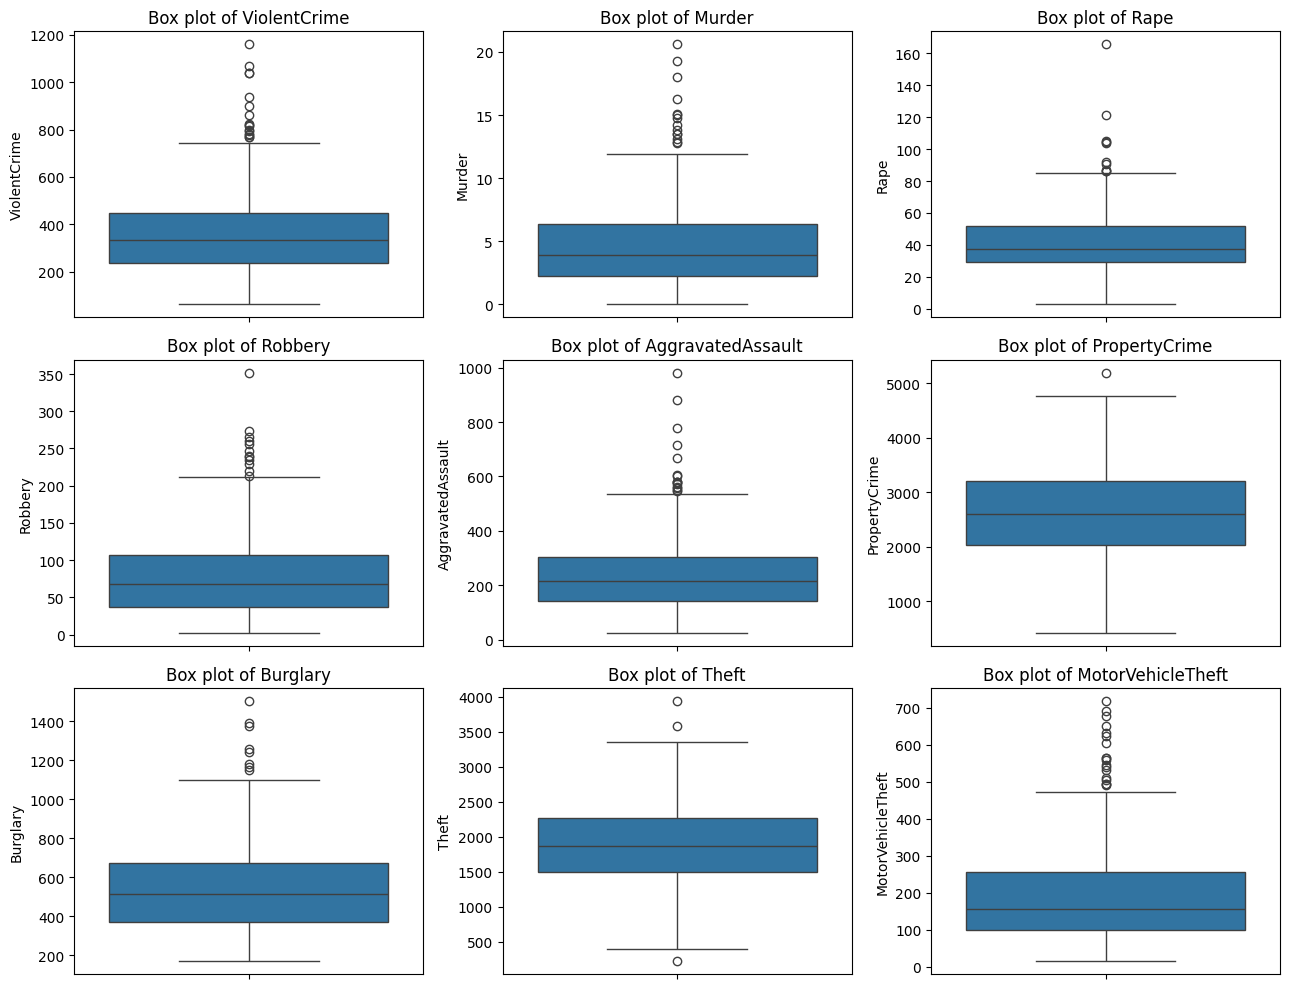

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(13, 10))

# Generate a box plot for each column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()


In [38]:
# Remove outlier rows from the DataFrame
data_filtered = data.drop(outlier_rows.index)

# Display the filtered DataFrame
print(data_filtered)

     ViolentCrime  Murder  Rape  Robbery  AggravatedAssault  PropertyCrime  \
0           412.5     5.3  56.0     78.4              272.8         3609.0   
1           238.4     5.1  38.2     75.2              119.8         2552.4   
2           667.9     7.8  30.4    157.9              471.8         3894.1   
3           114.3     2.5  28.2     20.7               63.0         3208.4   
6           216.5     0.8  28.7     25.5              161.6         1430.2   
..            ...     ...   ...      ...                ...            ...   
371         108.7     4.8   3.5     40.5               59.9          710.2   
372          99.3     6.9   2.7     53.1               36.6         1031.9   
373         251.6    11.4   6.3     74.6              159.3          823.2   
374         237.5    11.5   5.2     82.3              138.6         1320.0   
376          92.1     5.4   4.6     16.1               66.0          420.0   

     Burglary   Theft  MotorVehicleTheft  \
0       852.0  2493

In [39]:
data.describe()

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,365.750000,4.616935,41.408065,78.409677,241.316667,2632.131410,540.027432,1906.646973,192.725269
std,181.759348,3.388861,19.493622,54.071675,137.628215,814.812936,228.085397,575.676131,134.936364
min,61.600000,0.000000,2.700000,2.300000,25.500000,420.000000,168.900000,226.500000,15.700000
25%,236.450000,2.275000,29.000000,36.950000,144.100000,2029.150000,369.550000,1498.425000,98.900000
50%,333.800000,3.900000,37.550000,68.250000,215.600000,2603.050000,511.700000,1867.800000,157.400000
75%,448.025000,6.400000,51.775000,107.100000,305.200000,3207.950000,672.625000,2267.750000,255.250000
max,1160.000000,20.600000,165.600000,351.900000,981.300000,5190.600000,1503.700000,3936.400000,718.600000


The row counts across each column is equaly 372.

25% of the cities have fewer than 236.45 violent crimes.

half of the cities have fewer than 333.8 violent crimes.

The mean number of property crimes (2632.13) suggests that property crimes are more common compared to other categories like murders (4.62) or motor vehicle thefts (192.73).

# **EXPLORATORY DATA ANALYSIS**

## Pairplot


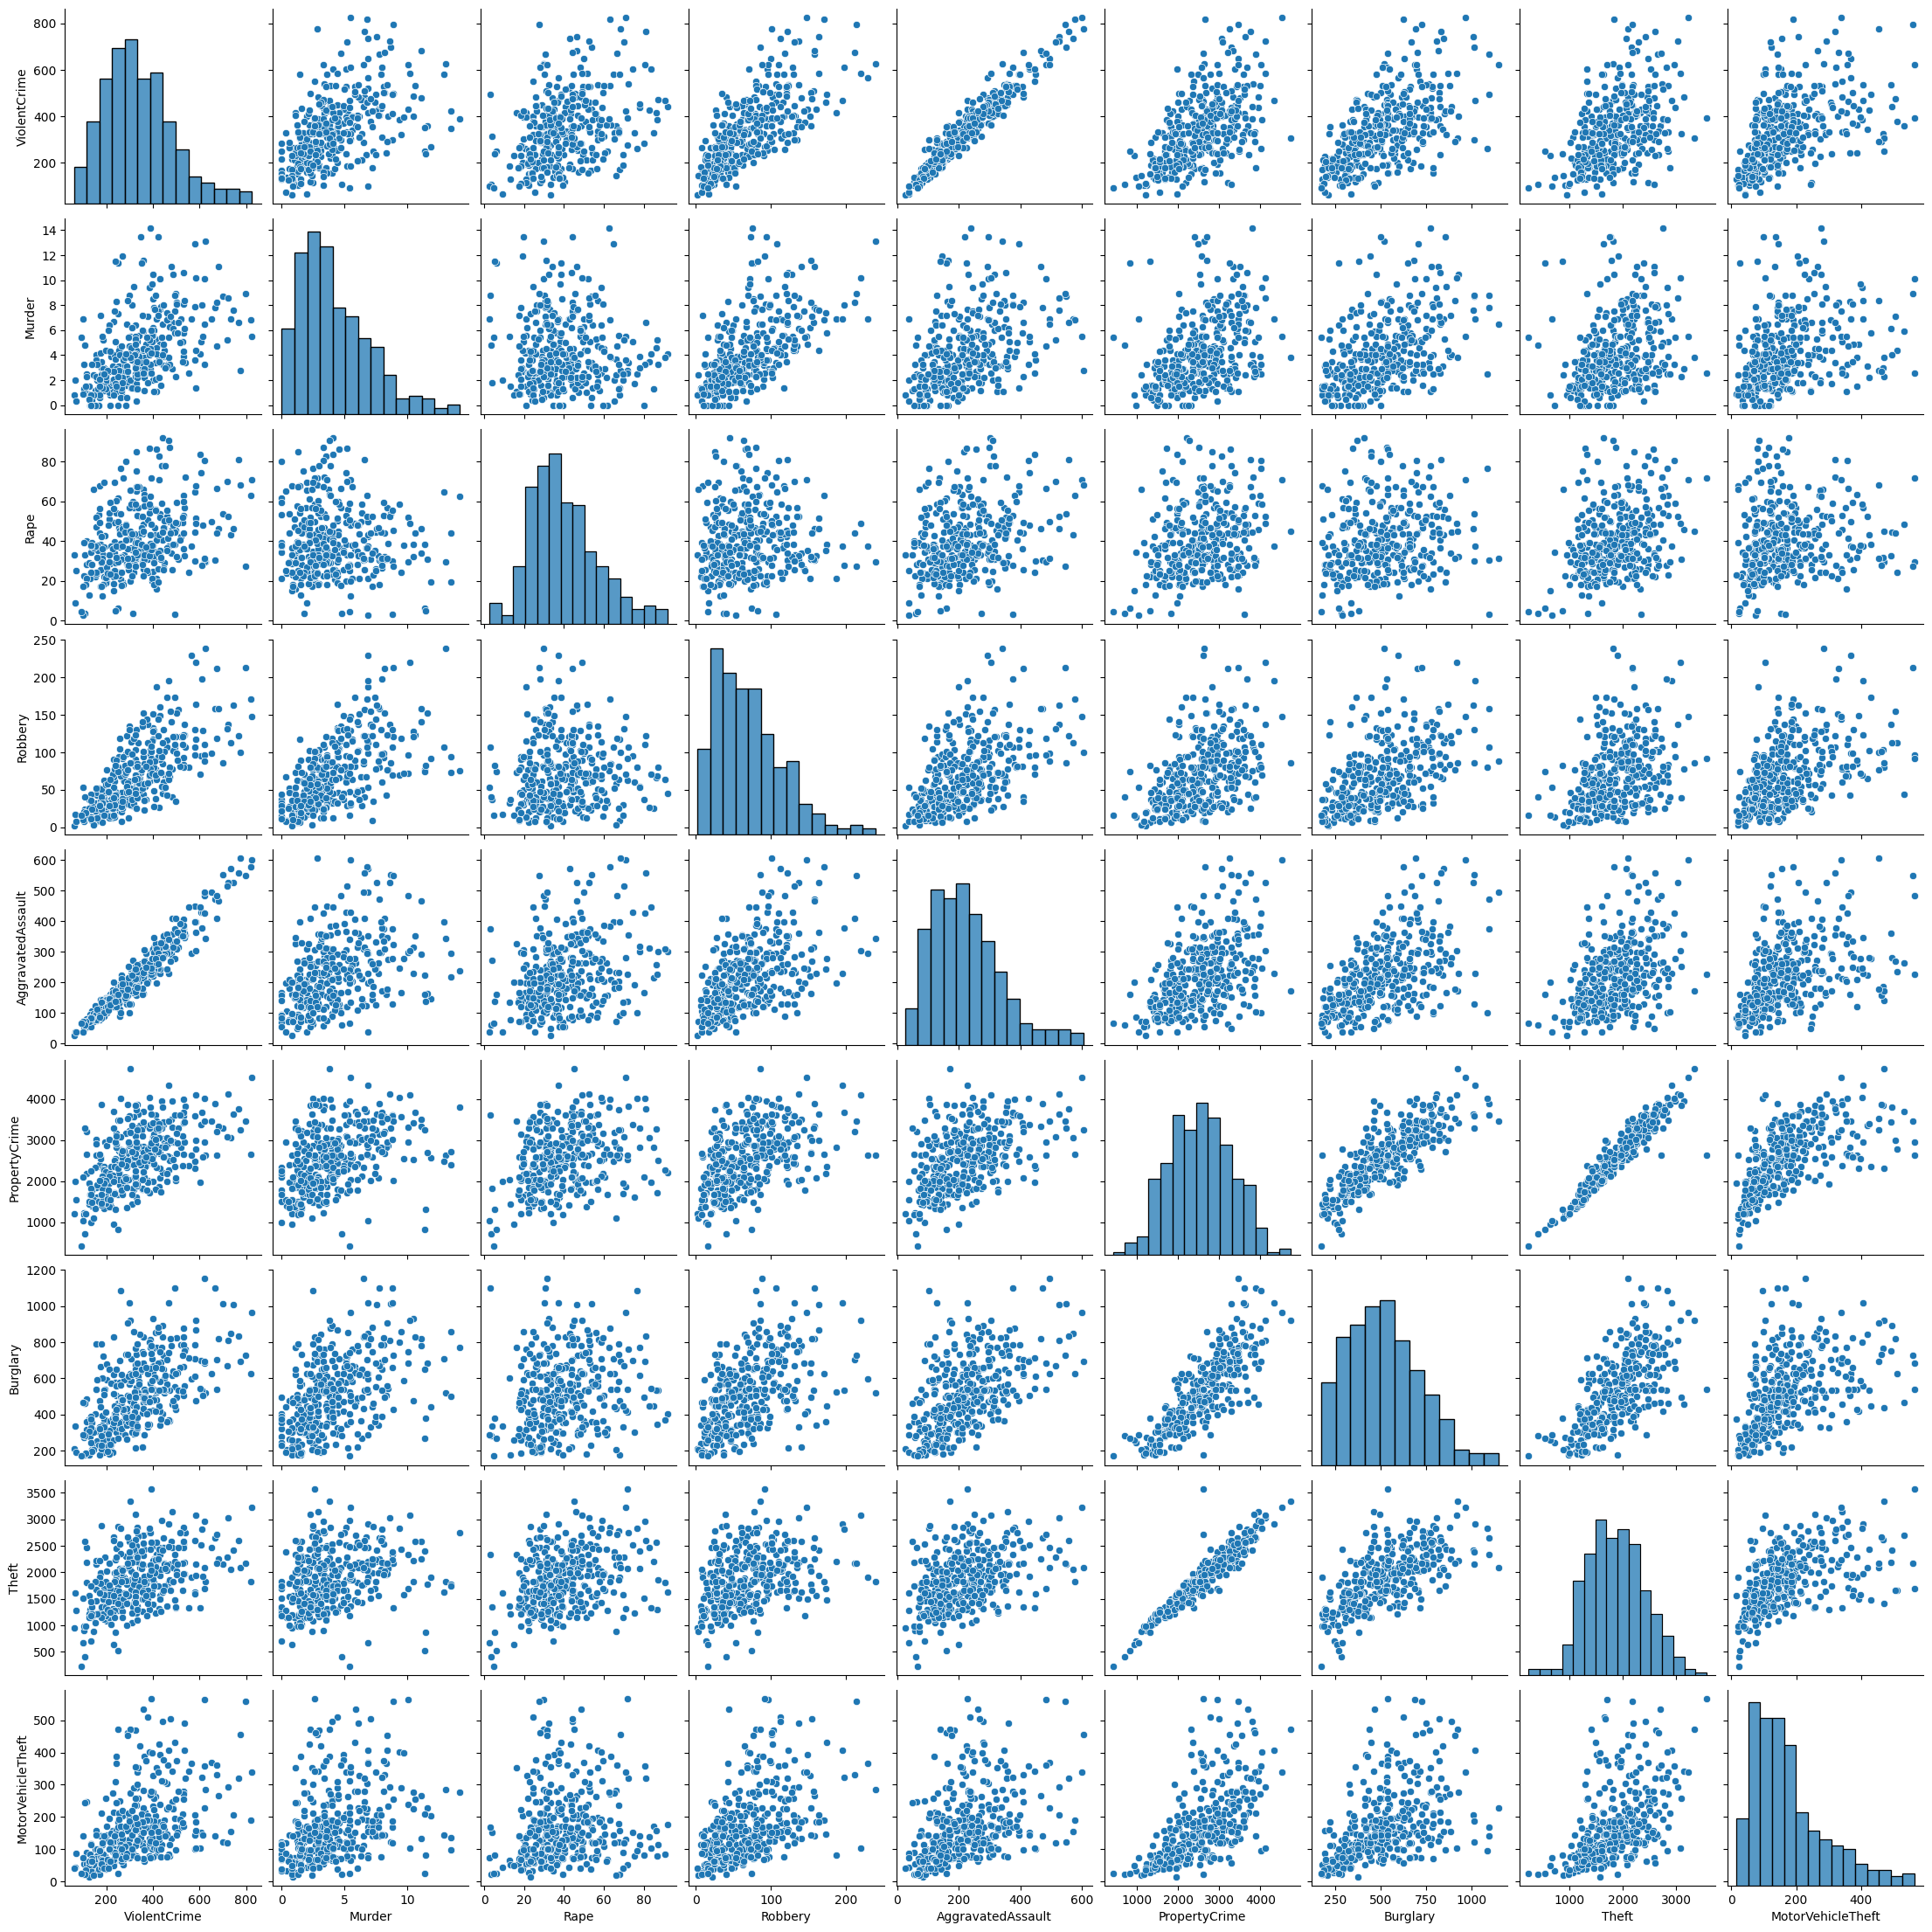

In [40]:
# Pairplot to visualize pairwise relationships and distributions
sns.pairplot(data_filtered)
plt.show()


* The column 'ViolentCrime' is Positively correlated with all other crime variables, especially Murder, Rape, Robbery, and AggravatedAssault.
The scatter plots indicate that as ViolentCrime increases, other crime rates tend to increase as well.

* Most crime variables are positively correlated with each other. This suggests that higher rates of one type of crime are associated with higher rates of other types of crime.
The strongest correlations are typically between crimes that are similar in nature, such as ViolentCrime with Murder, Rape, Robbery, and AggravatedAssault.

* Crimes related to violence (e.g., ViolentCrime, Murder, Rape, Robbery, AggravatedAssault) tend to be clustered together.
Property-related crimes (PropertyCrime, Burglary, Theft, MotorVehicleTheft) also show strong interrelationships.

* Many of the crime variables are right-skewed, indicating that there are a few cities with very high crime rates compared to the rest.

## Correlation Matrix

In [41]:
# Calculate the correlation matrix
data_numeric = data[numerical_columns]

# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                   ViolentCrime    Murder      Rape   Robbery  \
ViolentCrime           1.000000  0.505511  0.428234  0.723870   
Murder                 0.505511  1.000000 -0.035900  0.606007   
Rape                   0.428234 -0.035900  1.000000  0.123343   
Robbery                0.723870  0.606007  0.123343  1.000000   
AggravatedAssault      0.963104  0.409934  0.376304  0.530663   
PropertyCrime          0.607592  0.313011  0.333972  0.475653   
Burglary               0.628200  0.369765  0.254567  0.447919   
Theft                  0.505529  0.215261  0.356306  0.373851   
MotorVehicleTheft      0.512184  0.340445  0.141878  0.577232   

                   AggravatedAssault  PropertyCrime  Burglary     Theft  \
ViolentCrime                0.963104       0.607592  0.628200  0.505529   
Murder                      0.409934       0.313011  0.369765  0.215261   
Rape                        0.376304       0.333972  0.254567  0.356306   
Robbery                     0

## Heatmap


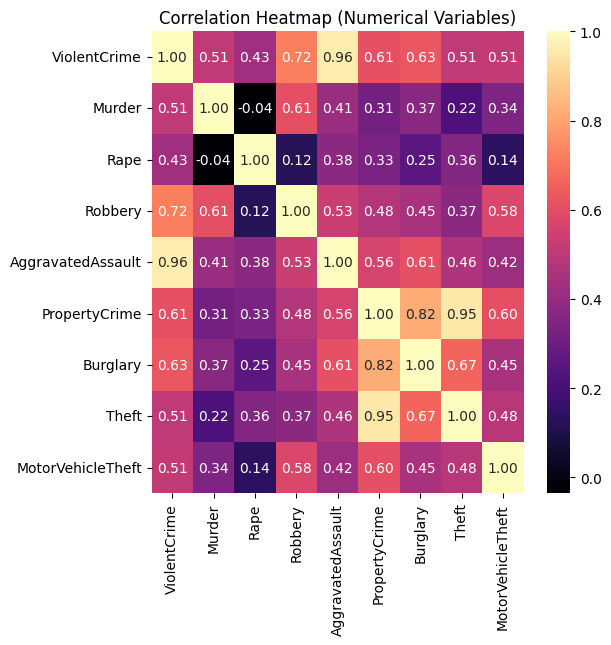

In [42]:
# Plot the correlation heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

The colors in the heatmap indicate the magnitude of the correlation, with lighter colors representing stronger positive correlations and darker colors representing weaker or negative correlations

96% - There is a very strong positive correlation between violent crimes and aggravated assaults.

*PropertyCrime against Burglary (82%) , Theft (95%) and MotorVehicleTheft(60%)* - Property crimes are strongly correlated with burglaries, thefts, and motor vehicle thefts, suggesting these crimes often occur together.

*Murder against Rape (-4%)*: No significant correlation, implying that these two types of crimes do not directly influence each other.

---

INSIGHTS :
1. High correlations between certain types of crimes (for instance ViolentCrime and AggravatedAssault) suggest that interventions targeting one crime may positively impact the other.

2. The strong correlations among property-related crimes can be useful in predictive models. For example, if a city has high burglary rates, it is likely to have high theft rates as well.





# SOLVING THE OBJECTIVE

The objective is to predict the crime risk category (e.g., high, medium, low) of a city based on its crime statistics using a decision tree algorithm.

For all the algorithms, we'll need to;

*   Load the necessary libraries.
*   Normalize the numeric columns if necessary.
*   Create a target variable for the crime risk category.
*   Split the data into training and test sets.
*   Train a decision tree classifier on the training data.


## 1. Classification and regression tree algorithm (CART)

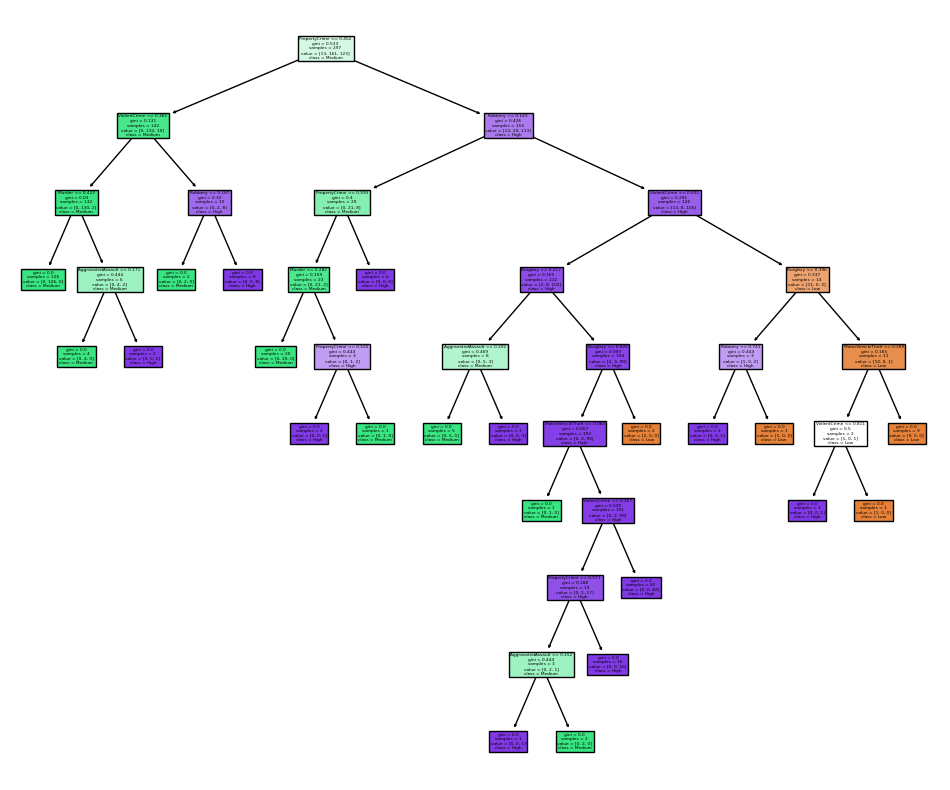

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Calculate overall crime score as a weighted sum (equal weights in this case)
## The mean(axis=1) function computes the mean of the specified columns for each row (each city) in the dataframe.
### The resulting mean value for each row is stored in a new column called CrimeScore.
#### This new column represents the overall crime score for each city, calculated as the average of the values in the specified crime columns.
data['CrimeScore'] = data[numerical_columns].mean(axis=1)

# Classify cities into risk categories
def classify_risk(score):
    if score > 0.50:
        return 'High'
    elif score > 0.30:
        return 'Medium'
    else:
        return 'Low'

data['CrimeRisk'] = data['CrimeScore'].apply(classify_risk)

# Prepare the feature matrix (X) and target vector (y)
X = data[numerical_columns]
y = data['CrimeRisk']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
## Here, clf is an instance of the DecisionTreeClassifier class from the scikit-learn library.
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plot_tree(clf, feature_names=numerical_columns, class_names=['Low', 'Medium', 'High'], filled=True)
plt.show()




**INSIGHTS**
1. Feature Importance: Features at the higher levels of the tree (e.g., ViolentCrime, MotorVehicleTheft, PropertyCrime) are more important in determining the class.
2. Class Distribution: The tree provides a detailed view of how different feature thresholds contribute to classifying cities into different risk categories.
3. Decision Boundaries: The thresholds used at each node represent decision boundaries that separate cities into different classes based on their crime statistics.

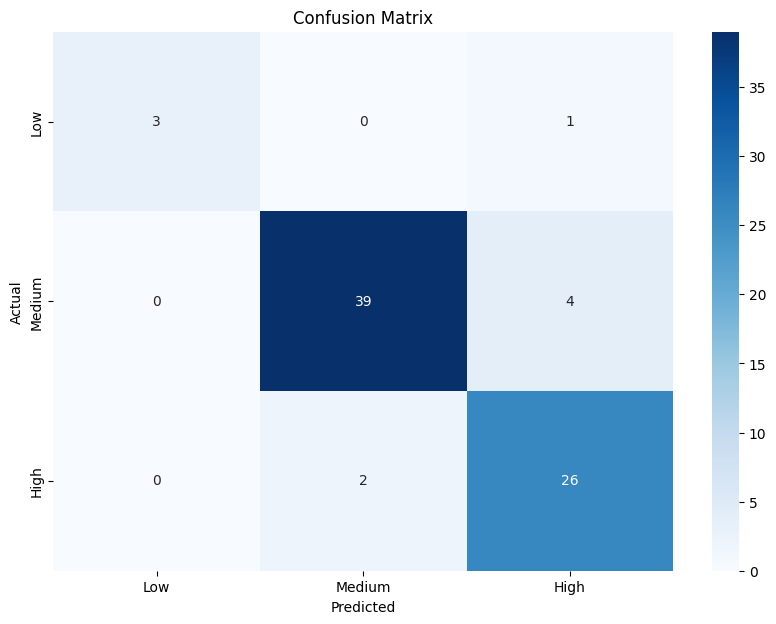

Accuracy: 0.9066666666666666
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.95      0.91      0.93        43
      Medium       0.84      0.93      0.88        28

    accuracy                           0.91        75
   macro avg       0.93      0.86      0.89        75
weighted avg       0.91      0.91      0.91        75



In [44]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



## 2. C4.5 & C5.0 Algorithm

Accuracy: 0.9032258064516129


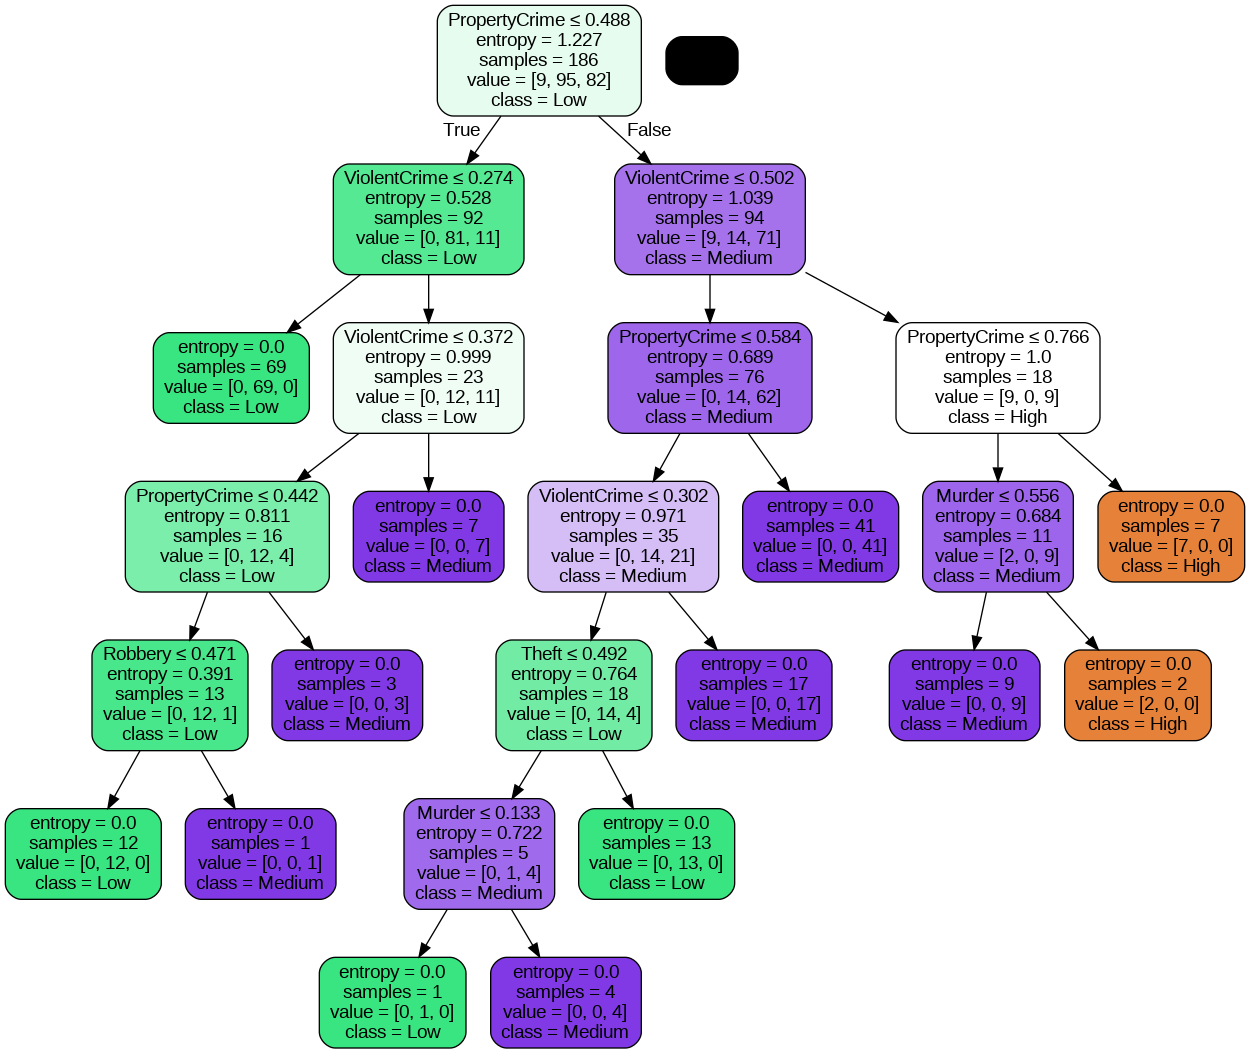

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pydotplus
from IPython.display import Image, display

X = data[numerical_columns]
y = data['CrimeRisk']

# Convert categorical target to numerical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=42)

# Initialize the model
clf = DecisionTreeClassifier(criterion='entropy')  # Using 'entropy' criterion similar to C4.5
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize the tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=numerical_columns,
                           class_names=label_encoder.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to render the dot file
graph = pydotplus.graph_from_dot_data(dot_data)
image = Image(graph.create_png())
display(image)



In [57]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00        61
      Medium       1.00      1.00      1.00        45

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Confusion Matrix:
 [[ 6  0  0]
 [ 0 61  0]
 [ 0  0 45]]


## 3. Iterative Dichotomizer 3 (ID3)


In [46]:
import numpy as np
import pandas as pd
import math
from typing import Any, Dict, List
from graphviz import Digraph
from IPython.display import display, SVG

class DecisionTreeID3:
    def __init__(self, max_depth: int = None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X: pd.DataFrame, y: pd.Series):
        data = X.copy()
        data['target'] = y
        self.tree = self._build_tree(data, depth=0)

    def predict(self, X: pd.DataFrame) -> List:
        return [self._predict_single(x, self.tree) for _, x in X.iterrows()]

    def _entropy(self, y: pd.Series) -> float:
        probabilities = y.value_counts(normalize=True)
        return -sum(p * math.log2(p) for p in probabilities)

    def _information_gain(self, data: pd.DataFrame, split_attribute: str, target_attribute: str) -> float:
        total_entropy = self._entropy(data[target_attribute])
        values, counts = np.unique(data[split_attribute], return_counts=True)
        weighted_entropy = sum((counts[i] / np.sum(counts)) * self._entropy(data.where(data[split_attribute] == v).dropna()[target_attribute]) for i, v in enumerate(values))
        return total_entropy - weighted_entropy

    def _best_split(self, data: pd.DataFrame, target_attribute: str) -> str:
        information_gains = {attribute: self._information_gain(data, attribute, target_attribute) for attribute in data.columns if attribute != target_attribute}
        return max(information_gains, key=information_gains.get)

    def _build_tree(self, data: pd.DataFrame, depth: int) -> Dict[str, Any]:
        target_attribute = 'target'
        if len(data[target_attribute].unique()) == 1:
            return data[target_attribute].values[0]
        elif self.max_depth is not None and depth >= self.max_depth:
            return data[target_attribute].mode()[0]
        else:
            best_split_attribute = self._best_split(data, target_attribute)
            tree = {best_split_attribute: {}}
            for value in data[best_split_attribute].unique():
                subtree = self._build_tree(data[data[best_split_attribute] == value].drop(columns=[best_split_attribute]), depth + 1)
                tree[best_split_attribute][value] = subtree
            return tree

    def _predict_single(self, x: pd.Series, tree: Dict[str, Any]) -> Any:
        if not isinstance(tree, dict):
            return tree
        attribute = next(iter(tree))
        if x[attribute] in tree[attribute]:
            return self._predict_single(x, tree[attribute][x[attribute]])
        else:
            return np.nan  # Handle unknown attribute values

    def export_graphviz(self, tree=None, parent=None, parent_name=None, dot=None):
        if tree is None:
            tree = self.tree
        if dot is None:
            dot = Digraph(format='svg')  # Specify SVG format here
        if not isinstance(tree, dict):
            dot.node(parent_name, label=str(tree), shape='ellipse')
            if parent:
                dot.edge(parent, parent_name)
            return dot
        for attribute, branches in tree.items():
            node_name = f'{parent_name}_{attribute}'
            dot.node(node_name, label=attribute, shape='box')
            if parent:
                dot.edge(parent, node_name)
            for branch_value, subtree in branches.items():
                child_name = f'{node_name}_{branch_value}'
                dot = self.export_graphviz(subtree, node_name, f'{node_name}_{branch_value}', dot)
        return dot

# Prepare the feature matrix (X) and target vector (y)
X = data[numerical_columns]
y = data['CrimeRisk']

# Initialize the ID3 decision tree
id3_tree = DecisionTreeID3(max_depth=3)
id3_tree.fit(X, y)

# Make predictions
predictions = id3_tree.predict(X)

# Display predictions
print(f'Predictions: {predictions}')

# Evaluate the model
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy}')

# Visualize the tree
dot = id3_tree.export_graphviz()
dot.render('id3_tree')
display(SVG(dot.pipe(format='svg')))


Predictions: ['Medium', 'Low', 'Medium', 'Low', 'High', 'High', 'Low', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'L

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

id3_predictions = id3_tree.predict(X)

# Evaluate
id3_accuracy = accuracy_score(y, id3_predictions)
id3_classification_report = classification_report(y, id3_predictions)
id3_confusion_matrix = confusion_matrix(y, id3_predictions)

print(f"ID3 Accuracy: {id3_accuracy}")
print("ID3 Classification Report:\n", id3_classification_report)
print("ID3 Confusion Matrix:\n", id3_confusion_matrix)


ID3 Accuracy: 1.0
ID3 Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        17
         Low       1.00      1.00      1.00       204
      Medium       1.00      1.00      1.00       151

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372

ID3 Confusion Matrix:
 [[ 17   0   0]
 [  0 204   0]
 [  0   0 151]]


## 4. Chi-squared automatic interaction detection (CHAID)

In [47]:
# Install necessary packages
!pip install graphviz scipy pandas


import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from graphviz import Digraph
from IPython.display import display, SVG

# Define CHAID splitting function
def chi2_split(data, target, features):
    best_feature = None
    best_p_value = 1

    for feature in features:
        contingency_table = pd.crosstab(data[feature], data[target])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        if p < best_p_value:
            best_feature = feature
            best_p_value = p

    return best_feature, best_p_value

# Define CHAIDNode class to build the tree
class CHAIDNode:
    def __init__(self, data, target, features, depth=0, max_depth=None):
        self.data = data
        self.target = target
        self.features = features
        self.depth = depth
        self.max_depth = max_depth
        self.children = []
        self.split_feature = None
        self.prediction = data[target].mode()[0]

        if len(data[target].unique()) > 1 and (max_depth is None or depth < max_depth):
            split_feature, p_value = chi2_split(data, target, features)
            if split_feature:
                self.split_feature = split_feature
                for value in data[split_feature].unique():
                    subset = data[data[split_feature] == value]
                    child = CHAIDNode(subset, target, features, depth + 1, max_depth)
                    self.children.append((value, child))

# Function to visualize the CHAID tree
def visualize_chaid(node, dot=None, parent=None, edge_label=''):
    if dot is None:
        dot = Digraph(format='svg')

    node_label = f'Pred: {node.prediction}\nSamples: {len(node.data)}'
    if node.split_feature:
        node_label += f'\nSplit: {node.split_feature}'

    dot.node(name=str(id(node)), label=node_label)

    if parent is not None:
        dot.edge(str(parent), str(id(node)), label=edge_label)

    for value, child in node.children:
        visualize_chaid(child, dot=dot, parent=id(node), edge_label=str(value))

    return dot


# Define the numerical columns and target column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
target_column = 'CrimeRisk'

# Prepare the feature matrix (X) and target vector (y)
X = data[numerical_columns]
y = data[target_column]

# Build and visualize the tree
root = CHAIDNode(data, target_column, numerical_columns, max_depth=3)
dot = visualize_chaid(root)
dot.render('chaid_tree')
display(SVG(dot.pipe(format='svg')))



In [56]:
# Evaluate the CHAID tree
accuracy = accuracy_score(y, predictions)
classification_rep = classification_report(y, predictions)
conf_matrix = confusion_matrix(y, predictions)

print(f'CHAID Accuracy: {accuracy}')
print('CHAID Classification Report:\n', classification_rep)
print('CHAID Confusion Matrix:\n', conf_matrix)


CHAID Accuracy: 1.0
CHAID Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        17
         Low       1.00      1.00      1.00       204
      Medium       1.00      1.00      1.00       151

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372

CHAID Confusion Matrix:
 [[ 17   0   0]
 [  0 204   0]
 [  0   0 151]]


##  5. Random Forest

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00        61
      Medium       1.00      1.00      1.00        45

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



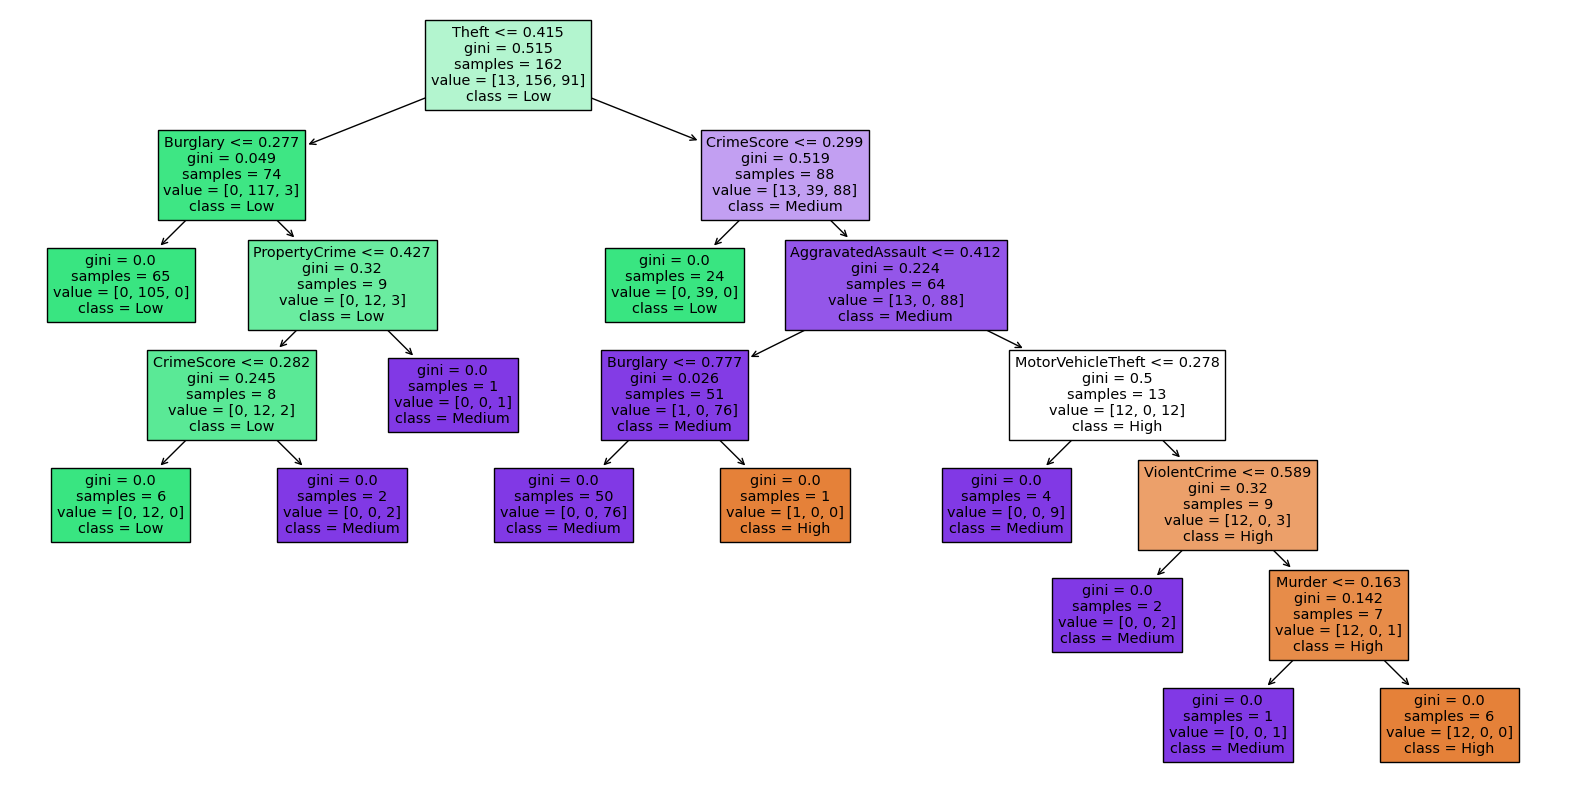

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define the numerical columns and target column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
target_column = 'CrimeRisk'

# Prepare the feature matrix (X) and target vector (y)
X = data[numerical_columns]
y = data[target_column]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize a single tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=numerical_columns, class_names=rf_model.classes_, filled=True)
plt.show()


In [54]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(X, y)

# Make predictions
rf_predictions = rf.predict(X)

# Evaluate
rf_accuracy = accuracy_score(y, rf_predictions)
rf_classification_report = classification_report(y, rf_predictions)
rf_confusion_matrix = confusion_matrix(y, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:\n", rf_classification_report)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)

# Feature importance
print("Feature Importances:\n", rf.feature_importances_)


Random Forest Accuracy: 0.9973118279569892
Random Forest Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.94      0.97        17
         Low       1.00      1.00      1.00       204
      Medium       0.99      1.00      1.00       151

    accuracy                           1.00       372
   macro avg       1.00      0.98      0.99       372
weighted avg       1.00      1.00      1.00       372

Random Forest Confusion Matrix:
 [[ 16   0   1]
 [  0 204   0]
 [  0   0 151]]
Feature Importances:
 [0.12966052 0.01306384 0.00182736 0.05123753 0.07075911 0.15984795
 0.08815708 0.03227234 0.01402714 0.43914713]


## Conditional decision trees

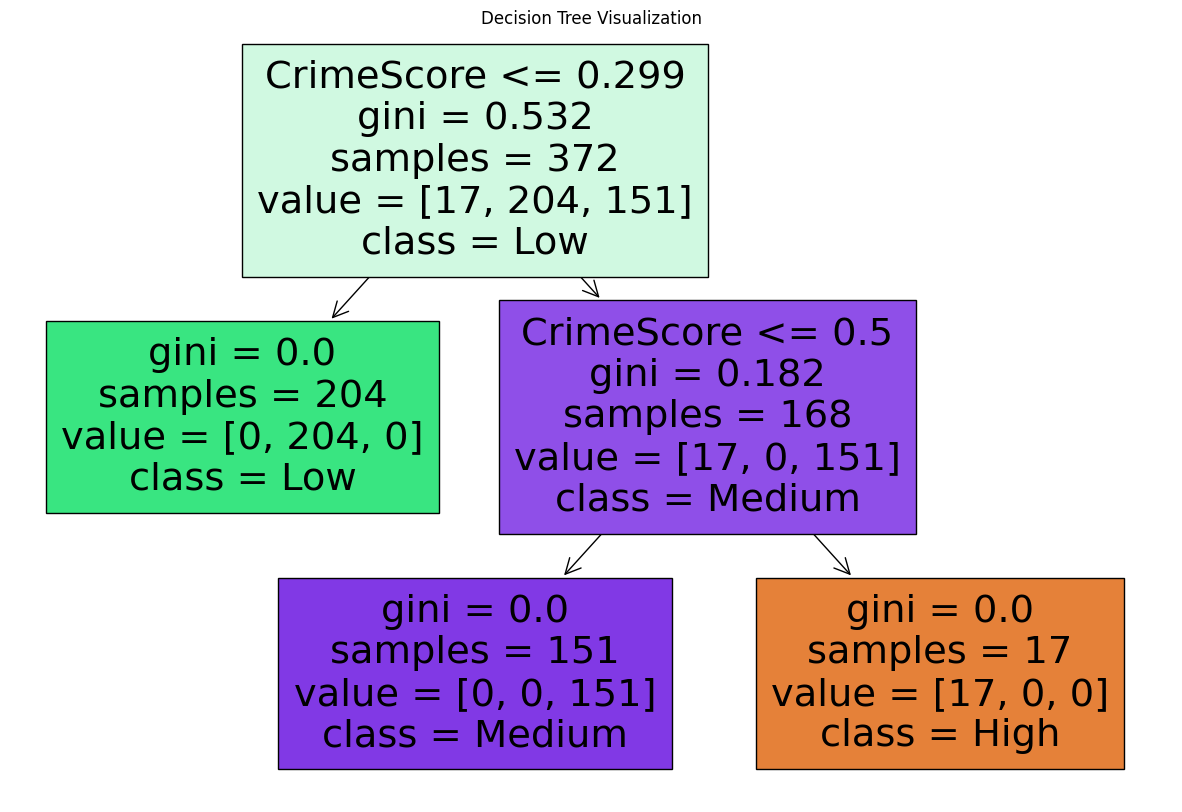

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt


def custom_split_condition(X, feature_idx):
    threshold = np.median(X[:, feature_idx])
    return X[:, feature_idx] <= threshold


class ConditionalDecisionTreeClassifier(DecisionTreeClassifier):
    def __init__(self, criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
                 max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None,
                 ccp_alpha=0.0):
        super().__init__(
            criterion=criterion,
            splitter=splitter,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            random_state=random_state,
            max_leaf_nodes=max_leaf_nodes,
            min_impurity_decrease=min_impurity_decrease,
            class_weight=class_weight,
            ccp_alpha=ccp_alpha
        )

    def _find_best_split(self, X, y, sample_weight, candidates):
        # Modify the splitting criteria using custom condition
        for feature_idx in candidates:
            # Apply custom splitting condition
            mask = custom_split_condition(X, feature_idx)
            if np.sum(mask) > 0 and np.sum(~mask) > 0:
                # Compute split criterion (e.g., Gini, Entropy)
                # Replace with your custom split criterion calculation
                criterion = self.criterion
                ...
                # Choose the best split based on criterion
                ...
        return best_split

# Define the numerical columns and target column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
target_column = 'CrimeRisk'

# Prepare the feature matrix (X) and target vector (y)
X = data[numerical_columns]
y = data[target_column]

# Initialize and fit the custom conditional decision tree
tree = ConditionalDecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=numerical_columns, class_names=tree.classes_)
plt.title("Decision Tree Visualization")
plt.show()

In [55]:

cdt_predictions = tree.predict(X)

# Evaluate
cdt_accuracy = accuracy_score(y, cdt_predictions)
cdt_classification_report = classification_report(y, cdt_predictions)
cdt_confusion_matrix = confusion_matrix(y, cdt_predictions)

print(f"Conditional Decision Tree Accuracy: {cdt_accuracy}")
print("Conditional Decision Tree Classification Report:\n", cdt_classification_report)
print("Conditional Decision Tree Confusion Matrix:\n", cdt_confusion_matrix)


Conditional Decision Tree Accuracy: 1.0
Conditional Decision Tree Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        17
         Low       1.00      1.00      1.00       204
      Medium       1.00      1.00      1.00       151

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372

Conditional Decision Tree Confusion Matrix:
 [[ 17   0   0]
 [  0 204   0]
 [  0   0 151]]
